# Challenge Set 8

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
from sklearn.model_selection import learning_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_recall_fscore_support as prfs
from sklearn.metrics import plot_roc_curve

In [21]:
from sklearn.model_selection import cross_validate

In [29]:
from sklearn.preprocessing import LabelBinarizer

### Challenge 1

For the house representatives data set, calculate the accuracy, precision, recall and f1 scores of each classifier you built (on the test set).

    knn_model = KNeighborsClassifier(n_neighbors=k)
        knn_model.fit(data,target)
        yp = knn_model.predict(test_data)
    logit_model = LogisticRegression()
    gnb_model = GaussianNB()
    svc_model = SVC()
    dtc_model = DecisionTreeClassifier()
    rfc_model = RandomForestClassifier()
    
I assume we are ignoring Challenge 7.10 and reverting to the situation for the earlier challenges.

Accuracy = Correct Predictions / All Test Cases

Precision = True Positives (Correctly Predicted Positives) / All Positive Predictions

Recall = True Positives (Correctly Predicted Positives) / All Actual Positives

F1 = 0.5 * (PR) / (P + R)

The routine

    sklearn.metrics.precision_recall_fscore_support

produces values of precision, recall, and F (F1 by default) focused on each class in what looks like a tuple of arrays.

In [2]:
vote_df = pd.read_csv('house-votes-84.data',header=None)
vote_df.replace(to_replace='y',value=1.0,inplace=True)
vote_df.replace(to_replace='n',value=0.0,inplace=True)
vote_df.replace(to_replace='?',value=np.nan,inplace=True)
vote_df.fillna(vote_df.mean(),inplace=True)
party = np.array(vote_df[0])
df = vote_df.copy()
del df[0]
X_train, X_test, y_train, y_test = \
    train_test_split(df,party,test_size=0.30,random_state=4444)

In [3]:
knn_model = KNeighborsClassifier(n_neighbors=6)
knn_model.fit(X_train,y_train)
knn_model.score(X_test,y_test)

0.9312977099236641

In [4]:
yk = knn_model.predict(X_test)
prfs(y_test,yk)

(array([0.925     , 0.94117647]),
 array([0.96103896, 0.88888889]),
 array([0.94267516, 0.91428571]),
 array([77, 54]))

In [5]:
logit_model = LogisticRegression()
logit_model.fit(X_train,y_train)
logit_model.score(X_test,y_test)

0.9312977099236641

In [6]:
yl = logit_model.predict(X_test)
prfs(y_test,yl)

(array([0.91463415, 0.95918367]),
 array([0.97402597, 0.87037037]),
 array([0.94339623, 0.91262136]),
 array([77, 54]))

In [7]:
gnb_model = GaussianNB()
gnb_model.fit(X_train,y_train)
gnb_model.score(X_test,y_test)

0.9389312977099237

In [8]:
yg = gnb_model.predict(X_test)
prfs(y_test,yg)

(array([0.91566265, 0.97916667]),
 array([0.98701299, 0.87037037]),
 array([0.95      , 0.92156863]),
 array([77, 54]))

In [9]:
svc_model = SVC()
svc_model.fit(X_train,y_train)
svc_model.score(X_test,y_test)

0.9465648854961832

In [10]:
ys = svc_model.predict(X_test)
prfs(y_test,ys)

(array([0.9375    , 0.96078431]),
 array([0.97402597, 0.90740741]),
 array([0.95541401, 0.93333333]),
 array([77, 54]))

In [11]:
dtc_model = DecisionTreeClassifier()
dtc_model.fit(X_train,y_train)
dtc_model.score(X_test,y_test)

0.9389312977099237

In [12]:
yd = dtc_model.predict(X_test)
prfs(y_test,yd)

(array([0.92592593, 0.96      ]),
 array([0.97402597, 0.88888889]),
 array([0.94936709, 0.92307692]),
 array([77, 54]))

In [13]:
rfc_model = RandomForestClassifier()
rfc_model.fit(X_train,y_train)
rfc_model.score(X_test,y_test)

0.9541984732824428

In [14]:
yr = rfc_model.predict(X_test)
prfs(y_test,yr)

(array([0.94936709, 0.96153846]),
 array([0.97402597, 0.92592593]),
 array([0.96153846, 0.94339623]),
 array([77, 54]))

### Challenge 2

For each, draw the ROC curve and calculate the AUC.

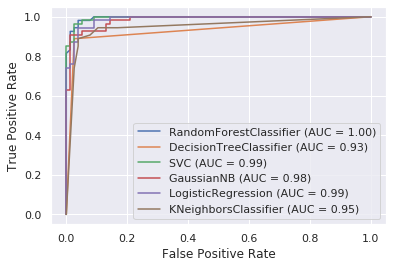

In [20]:
ax = plt.gca()
rfc_plot = plot_roc_curve(rfc_model,X_test,y_test,ax=ax)
dtc_plot = plot_roc_curve(dtc_model,X_test,y_test,ax=ax)
svc_plot = plot_roc_curve(svc_model,X_test,y_test,ax=ax)
gnb_plot = plot_roc_curve(gnb_model,X_test,y_test,ax=ax)
logit_plot = plot_roc_curve(logit_model,X_test,y_test,ax=ax)
knn_plot = plot_roc_curve(knn_model,X_test,y_test,ax=ax)
plt.show()

### Challenge 3

Calculate the same metrics you did in challenge 1, but this time in a cross validation scheme with the cross_val_score function (like in Challenge 9).

    knn, logit, gnb, svc, dtc, rfc
    
calculate the accuracy, precision, recall and f1 scores of each classifier

I have to specify a "positive" label. I apparently need to call a new routine to do this. It maps the less common label 'republican' to 1 and the more common 'democrat' to 0.

In [35]:
lb = LabelBinarizer()
target = np.ravel(lb.fit_transform(party))

In [38]:
print("knn model results by cross-validation")
knn_acc = cross_validate(knn_model,df,target,scoring='accuracy',
            return_train_score=True)
print("Accuracy: ",np.mean(knn_acc['test_score']))
knn_prec = cross_validate(knn_model,df,target,scoring='precision',
            return_train_score=True)
print("Precision: ",np.mean(knn_prec['test_score']))
knn_rec = cross_validate(knn_model,df,target,scoring='recall',
            return_train_score=True)
print("Recall: ",np.mean(knn_rec['test_score']))
knn_f1 = cross_validate(knn_model,df,target,scoring='f1',
            return_train_score=True)
print("F1: ",np.mean(knn_f1['test_score']))

knn model results by cross-validation
Accuracy:  0.9333333333333332
Precision:  0.9044598285964509
Recall:  0.9285204991087344
F1:  0.9151236532780272


In [39]:
print("logit model results by cross-validation")
logit_acc = cross_validate(logit_model,df,target,scoring='accuracy',
            return_train_score=True)
print("Accuracy: ",np.mean(logit_acc['test_score']))
logit_prec = cross_validate(logit_model,df,target,scoring='precision',
            return_train_score=True)
print("Precision: ",np.mean(logit_prec['test_score']))
logit_rec = cross_validate(logit_model,df,target,scoring='recall',
            return_train_score=True)
print("Recall: ",np.mean(logit_rec['test_score']))
logit_f1 = cross_validate(logit_model,df,target,scoring='f1',
            return_train_score=True)
print("F1: ",np.mean(logit_f1['test_score']))

logit model results by cross-validation
Accuracy:  0.9540229885057471
Precision:  0.9323998186498187
Recall:  0.9524064171122995
F1:  0.9415697346132129


In [40]:
print("gnb model results by cross-validation")
gnb_acc = cross_validate(gnb_model,df,target,scoring='accuracy',
            return_train_score=True)
print("Accuracy: ",np.mean(gnb_acc['test_score']))
gnb_prec = cross_validate(gnb_model,df,target,scoring='precision',
            return_train_score=True)
print("Precision: ",np.mean(gnb_prec['test_score']))
gnb_rec = cross_validate(gnb_model,df,target,scoring='recall',
            return_train_score=True)
print("Recall: ",np.mean(gnb_rec['test_score']))
gnb_f1 = cross_validate(gnb_model,df,target,scoring='f1',
            return_train_score=True)
print("F1: ",np.mean(gnb_f1['test_score']))

gnb model results by cross-validation
Accuracy:  0.9402298850574713
Precision:  0.9180567964349049
Recall:  0.9345811051693405
F1:  0.9247033331208974


In [41]:
print("svc model results by cross-validation")
svc_acc = cross_validate(svc_model,df,target,scoring='accuracy',
            return_train_score=True)
print("Accuracy: ",np.mean(svc_acc['test_score']))
svc_prec = cross_validate(svc_model,df,target,scoring='precision',
            return_train_score=True)
print("Precision: ",np.mean(svc_prec['test_score']))
svc_rec = cross_validate(svc_model,df,target,scoring='recall',
            return_train_score=True)
print("Recall: ",np.mean(svc_rec['test_score']))
svc_f1 = cross_validate(svc_model,df,target,scoring='f1',
            return_train_score=True)
print("F1: ",np.mean(svc_f1['test_score']))

svc model results by cross-validation
Accuracy:  0.9563218390804596
Precision:  0.9332533037138301
Recall:  0.9584670231729057
F1:  0.9447085676112008


In [42]:
print("dtc model results by cross-validation")
dtc_acc = cross_validate(dtc_model,df,target,scoring='accuracy',
            return_train_score=True)
print("Accuracy: ",np.mean(dtc_acc['test_score']))
dtc_prec = cross_validate(dtc_model,df,target,scoring='precision',
            return_train_score=True)
print("Precision: ",np.mean(dtc_prec['test_score']))
dtc_rec = cross_validate(dtc_model,df,target,scoring='recall',
            return_train_score=True)
print("Recall: ",np.mean(dtc_rec['test_score']))
dtc_f1 = cross_validate(dtc_model,df,target,scoring='f1',
            return_train_score=True)
print("F1: ",np.mean(dtc_f1['test_score']))

dtc model results by cross-validation
Accuracy:  0.9379310344827587
Precision:  0.9129363994639137
Recall:  0.9401069518716578
F1:  0.9288355839848379


In [43]:
print("rfc model results by cross-validation")
rfc_acc = cross_validate(rfc_model,df,target,scoring='accuracy',
            return_train_score=True)
print("Accuracy: ",np.mean(rfc_acc['test_score']))
rfc_prec = cross_validate(rfc_model,df,target,scoring='precision',
            return_train_score=True)
print("Precision: ",np.mean(rfc_prec['test_score']))
rfc_rec = cross_validate(rfc_model,df,target,scoring='recall',
            return_train_score=True)
print("Recall: ",np.mean(rfc_rec['test_score']))
rfc_f1 = cross_validate(rfc_model,df,target,scoring='f1',
            return_train_score=True)
print("F1: ",np.mean(rfc_f1['test_score']))

rfc model results by cross-validation
Accuracy:  0.9609195402298851
Precision:  0.9441832904332905
Recall:  0.9641711229946525
F1:  0.953076946847226


### Challenge 4

For your movie classifiers, calculate the precision and recall for each class.

In [44]:
mv_df = pd.read_csv('2013_movies.csv')
mv_df = mv_df[mv_df['Rating']!='G']
mv_df = mv_df[mv_df['Budget'].notna()]
rat = mv_df['Rating'].copy()
del mv_df['Rating']
del mv_df['Title']
del mv_df['Director']
mv_df['Date']=pd.to_datetime(mv_df['ReleaseDate'],format='%Y-%m-%d %H:%M:%S')
mv_df['JDay']=mv_df['Date'].dt.strftime('%j').astype(float)
del mv_df['ReleaseDate']
del mv_df['Date']
mv_knn = KNeighborsClassifier(n_neighbors=6)
mv_loge = LogisticRegression()

In [45]:
d_train,d_test,r_train,r_test=train_test_split(mv_df,rat,random_state=4444,test_size=0.30)

In [49]:
mv_knn.fit(d_train,r_train)
rk = mv_knn.predict(d_test)
klist = prfs(r_test,rk)
print("Precision per category ",tuple(mv_knn.classes_),": ",tuple(klist[0]))
print("Recall per category: ",tuple(klist[1]))

Precision per category  ('PG', 'PG-13', 'R') :  (1.0, 0.38461538461538464, 0.38461538461538464)
Recall per category:  (0.16666666666666666, 0.4166666666666667, 0.5555555555555556)


In [50]:
mv_loge.fit(d_train,r_train)
rl = mv_loge.predict(d_test)
llist = prfs(r_test,rl)
print("Precision per category ",tuple(mv_loge.classes_),": ",tuple(llist[0]))
print("Recall per category: ",tuple(llist[1]))

Precision per category  ('PG', 'PG-13', 'R') :  (0.0, 0.4782608695652174, 0.5)
Recall per category:  (0.0, 0.9166666666666666, 0.2222222222222222)


/home/paulus/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Challenge 5

Draw the ROC curve (and calculate AUC) for the logistic regression classifier from challenge 12.

In [52]:
cdf = pd.read_csv('haberman.data',header=None)
cdf.columns = ['Age','Year','Nodes','Survival']
cmodel = LogisticRegression()
y = cdf['Survival']
X = cdf.copy()
del X['Survival']
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                test_size=0.30,
                                random_state=4444)
cmodel.fit(X_train,y_train);

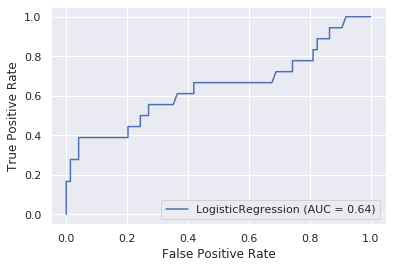

In [53]:
plot_roc_curve(cmodel,X_test,y_test)

It is finished.